In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import datetime
import pickle
import seaborn as sns

In [2]:
df = pd.read_pickle('weather_ozone')

**The first step was to import all the relevant packages and upload the dataframe from the pickle. Afterwards, there was a great deal of possibilities to explore with the data, to see how it appears and what insights can be gathered from it. Since ozone concentration (ppm) is the target variable, the first step was to simply visualize the entire scope of the data and see how it appears. This dataframe includes 68,231 rows, and it consists of every hour of observation from 2008 to 2015, inclusive.**

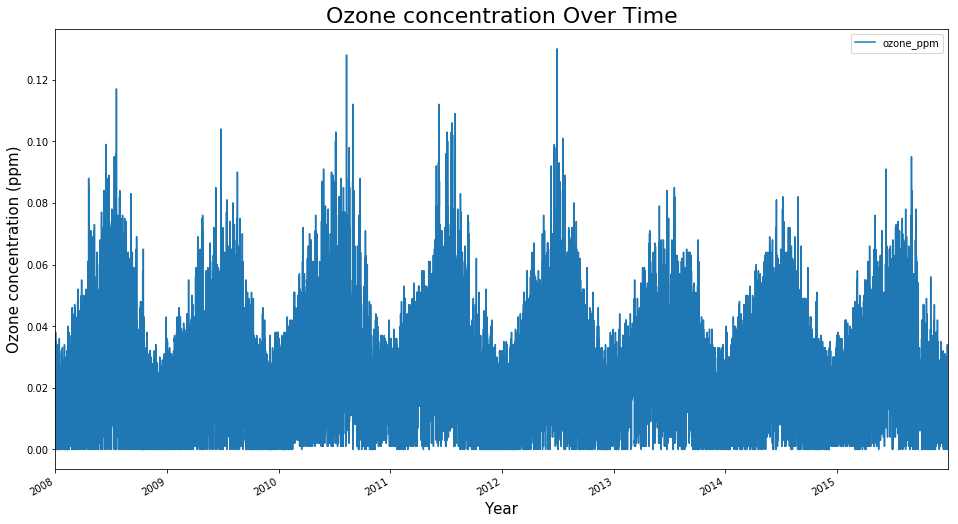

In [3]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = df.plot(y= 'ozone_ppm')
_ = plt.title("Ozone concentration Over Time", size=22)
_ = plt.xlabel("Year", size=15)
_ = plt.ylabel("Ozone concentration (ppm)", size=15)


**As shown above, the plot displays so much data that all of the hourly fluctuations in the ozone concentration cannot clearly be seen. However, the cyclical nature of the target variable's value is apparant. During the beginning and end of the year (the colder months), the ozone concentration tends to hover around 0.03 to 0.04 ppm, while in the warmer months, the concentration often reaches 0.08 ppm and sometimes exceeds 0.1 ppm. This observation is not surprising, since air quality tends to be an issue mainly during a summer heatwave.**

**We will now zoom in to 2011 and display the ozone data for that year alone.**

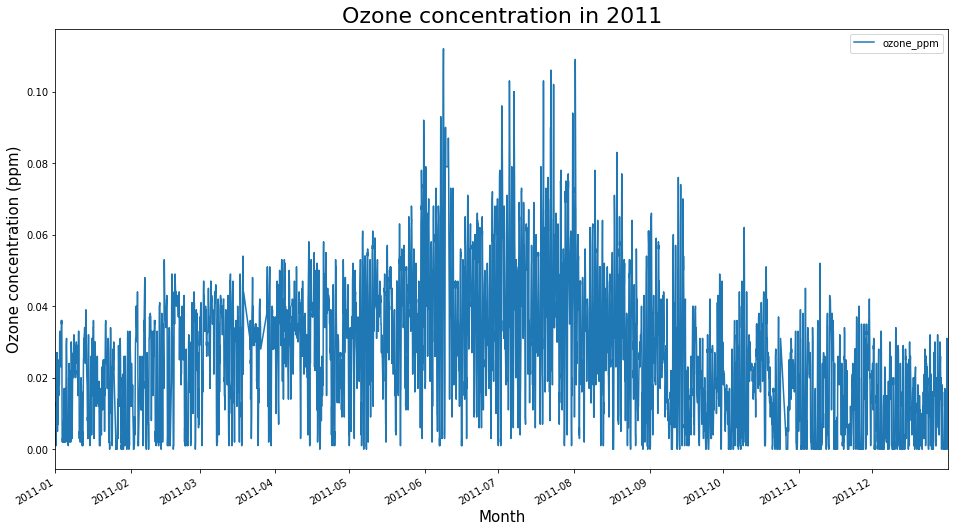

In [4]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = df['2011'].plot(y= 'ozone_ppm')
_ = plt.title("Ozone concentration in 2011", size=22)
_ = plt.xlabel("Month", size=15)
_ = plt.ylabel("Ozone concentration (ppm)", size=15)


**With the data zoomed in on 2011 alone, the daily fluctuations of ozone values can more easily be seen. In fact, regardless of the season, ozone concentrations tend to bottom out at 0.00 to 0.01 ppm on most days. However, the seasonal fluctuation can be more easily seen, with significantly higher values in the summer months.**

**We will zoom to July 2011 so that the daily fluctuations can be seen even more clearly.**

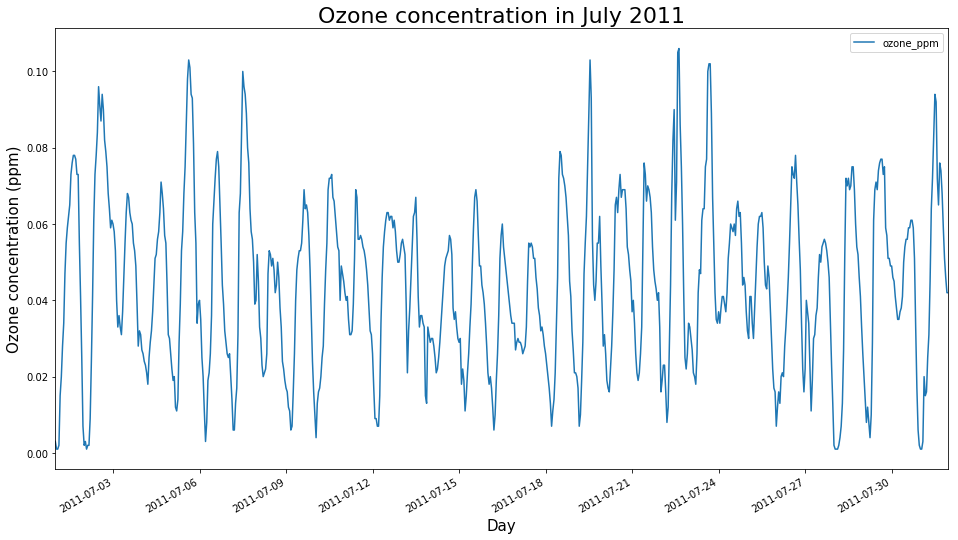

In [5]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = df['2011-07'].plot(y= 'ozone_ppm')
_ = plt.title("Ozone concentration in July 2011", size=22)
_ = plt.xlabel("Day", size=15)
_ = plt.ylabel("Ozone concentration (ppm)", size=15)


**With the plot focused exclusively on July 2011, the daily fluctuations can be seen with much greater clarity compared to the previous plots. Ozone concentrations clearly appear to rise and fall throughout the day, with levels occasionally exceeding 0.10 ppm on some days.**

In [6]:
#monthly = df.ozone_ppm.resample('M').mean()
midday = df[df.index.hour.isin([10,11,12,13,14,15,16])]

In [7]:
monthly_day_ozone = midday.groupby(midday.index.month).mean()
month_names = np.array(['January', 'February', 'March', 'April', 'May',         
       'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_day_ozone.set_index(month_names, inplace=True)
monthly_day_ozone = monthly_day_ozone.ozone_ppm

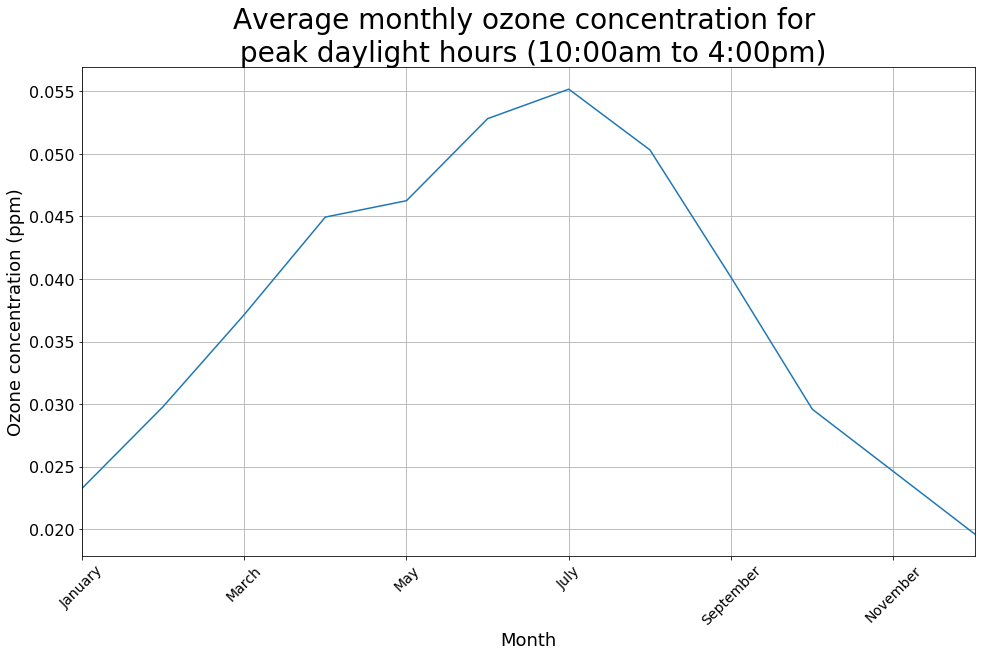

In [8]:
monthly_day_ozone.plot()
plt.title("Average monthly ozone concentration for \n peak daylight hours (10:00am to 4:00pm)", size=28)
plt.xticks(rotation=45, size=14)
plt.yticks(size=16)
plt.xlabel("Month", size=18)
plt.ylabel("Ozone concentration (ppm)", size=18)
plt.grid()
plt.show()

**For a cleaner, more simple visualization of the seasonal differences in ozone levels, the monthly mean of ozone levels during peak daylight hours was plotted for every month. The dataframe was filtered to only include data for the hours from 10:00am to 4:00pm, and then the average monthly levels were taken.  Average ozone levels during those hours range from under 0.02 ppm in December, to over 0.05 ppm in the summer months. **

In [9]:
print 'Square root of total number of values:', np.sqrt(len(df))
print 'Min ozone_ppm:', df.ozone_ppm.min()
print 'Max ozone_ppm:', df.ozone_ppm.max()
print 'Number of unique values for ozone_ppm:', df.ozone_ppm.nunique()

Square root of total number of values: 261.382860953
Min ozone_ppm: 0.0
Max ozone_ppm: 0.13
Number of unique values for ozone_ppm: 119


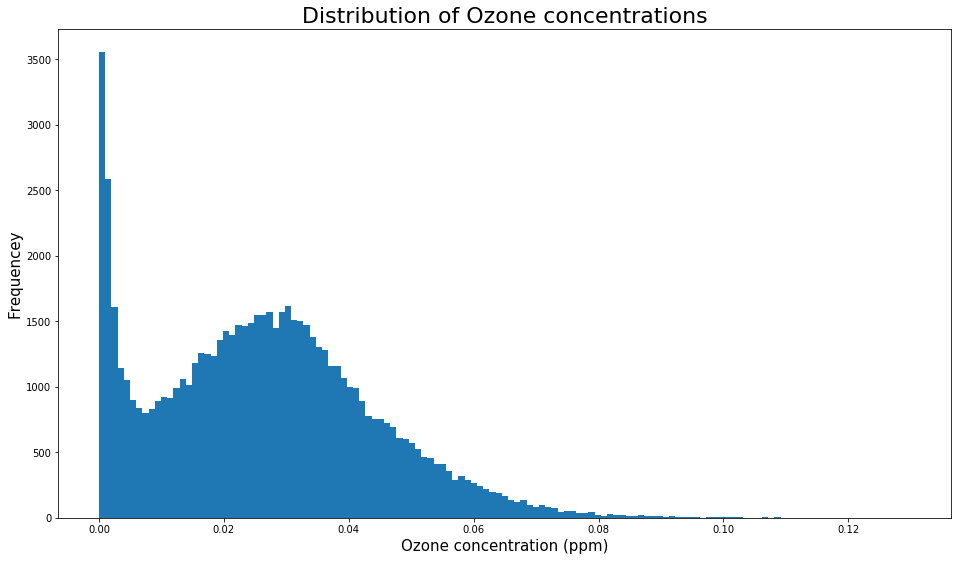

In [10]:
#df.plot(y='ozone_ppm', kind='hist', bins='freedman')
plt.hist(df.ozone_ppm, bins= 131)
plt.title("Distribution of Ozone concentrations", size=22)
plt.xlabel("Ozone concentration (ppm)", size=15)
plt.ylabel("Frequencey", size=15)
plt.show()

**The frequency of ozone concentrations was plotted in the histogram above. One rule of thumb to use when determining the number of bins in a histogram is to choose the square root of the total number of datapoints. However, another consideration is the number of unique values for the variable being plotted. The square root of the total number of datapoints is much greater than the number of unique values, so the latter number is much closer to being optimal. Finally, the total range of values was considered, with a maximum value of 0.13 ppm and a minimum value of 0. Therefore, the number of bins was set to 131.**

**The above plot appears as a smooth curve. Ozone values near zero tend to be the most common values found, but after a quick drop, the frequency of values appears to rise starting from just before 0.01 up to around 0.03. Afterwards, the frequency gradually declines, with a very long tail that extends past 0.10 ppm.**

**Next, the variables that may influence ozone levels will be evaluated.** 

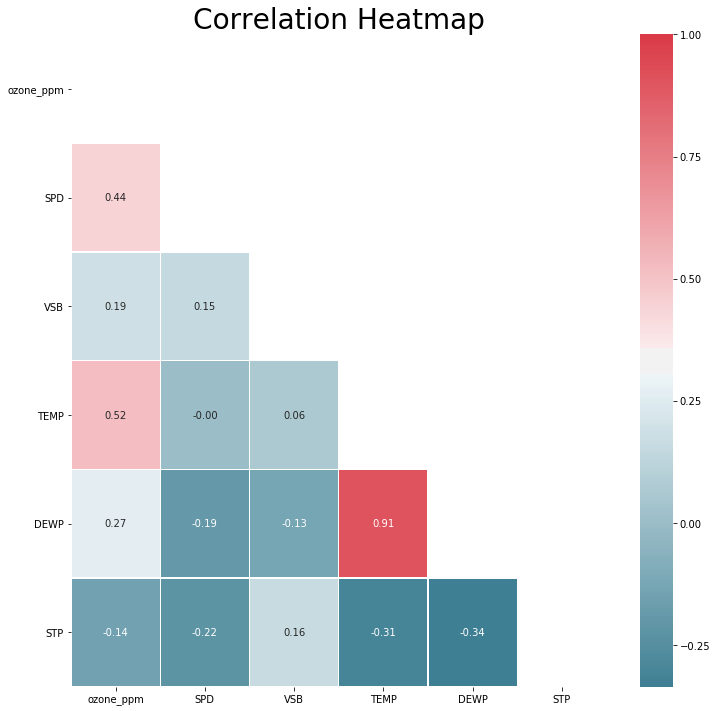

In [11]:
#Create Correlation df
corr_matrix = df.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f", mask=mask, linewidths=0.2) 
    #show plot
plt.title("Correlation Heatmap", size=28)
plt.yticks(rotation = 0)

plt.show()

**The correlation heatmap shows the pairwise correlations between all of the variables of the dataframe. The dew point is regarded as a proxy for humidity, and not surprisingly, the dew point and temperature are very highly correlated. However, since ozone concentration is the target variable, any correlations of the other variables with ozone levels will be of particular interest. The far left column shows the correlations of each of the feature variables with ozone concentration, with temperature and wind speed having the strongest correlation with the ozone level. The dew point has a weaker relationship with ozone levels, but even that variable might be of interest for more exploration.**

**Since the ozone time series plots show seasonal variation in the ozone concentration, does a similar seasonal variation exist in these correlations? These correlations will be further explored on a monthly basis to reveal more insight into the relationship between those weather variables and the ozone levels. **

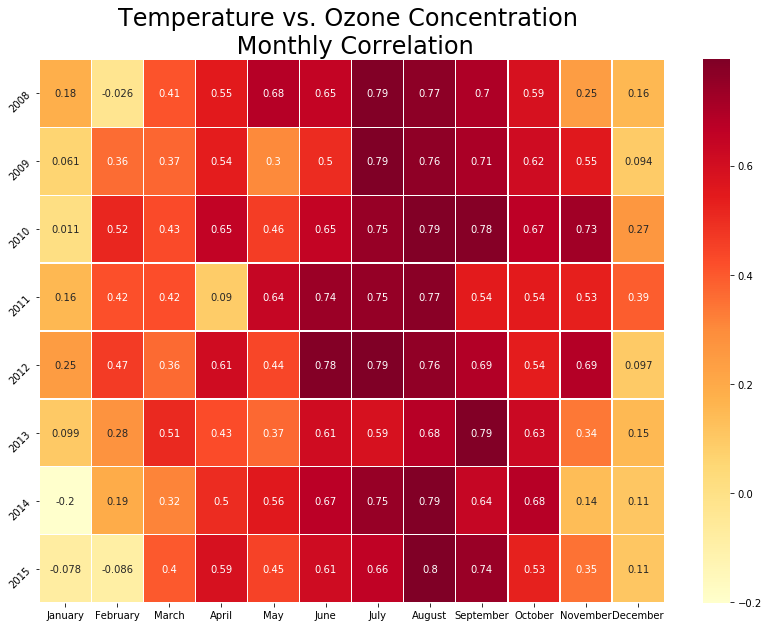

In [12]:
years = sorted(df.index.year.unique())
months = sorted(df.index.month.unique())
month_names = ['January', 'February', 'March', 'April', 'May',         
       'June', 'July', 'August', 'September', 'October', 'November', 'December']

temp_corr = []
for yr in years:
    temp_corr.append([])
    for mo in months:
        temp_corr[-1].append(df[(df.index.year == yr) & 
                                (df.index.month == mo)][['ozone_ppm','TEMP']].corr().iloc[0,1])
temp_corr = np.array(temp_corr)
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(temp_corr, xticklabels = month_names, yticklabels = years, annot=True, 
            linewidths=.2, cmap="YlOrRd")
plt.title("Temperature vs. Ozone Concentration \n Monthly Correlation", size=24)
plt.yticks(rotation=45)
plt.show()

**As seen above, the temperature vs. ozone heatmap shows a dramatic seasonal difference in the relationship between temperature and ozone level. That relationship is much stronger in the warmer months, especially from June to September, than it is in the winter months, when correlations near zero are common. Since the summer months are the most likely time for heat waves that affect air quality, the temperature is a powerful predictor of ozone levels when they are the most relevant.**

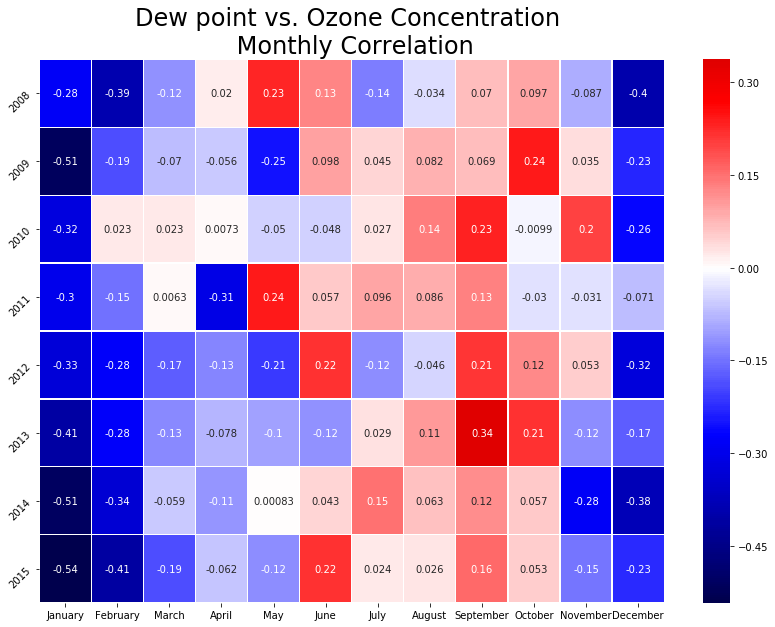

In [13]:
dewp_corr = []    
for yr in years:
    dewp_corr.append([])
    for mo in months:
        dewp_corr[-1].append(df[(df.index.year == yr) & 
                                (df.index.month == mo)][['ozone_ppm','DEWP']].corr().iloc[0,1])
dewp_corr = np.array(dewp_corr)
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(dewp_corr, xticklabels = month_names, yticklabels = years, 
            annot=True, linewidths=.2, cmap="seismic", center=0)
plt.title("Dew point vs. Ozone Concentration \n Monthly Correlation", size=24)
plt.yticks(rotation=45)
plt.show()

**Although the temperature and dew point are highly correlated among each other, the dew point does not correlate with ozone levels as well as the temperature does. In fact, even in the summer months, average monthly correlations near zero are common. However, in the winter months, dew points have a moderate negative correlation with ozone levels. In other words, higher dew points in the winter are moderately associated with lower ozone concentrations. Nevertheless, since ozone concentrations in the winter months typically range from zero to 0.04 ppm, the practical value of this correlation is negligible.**

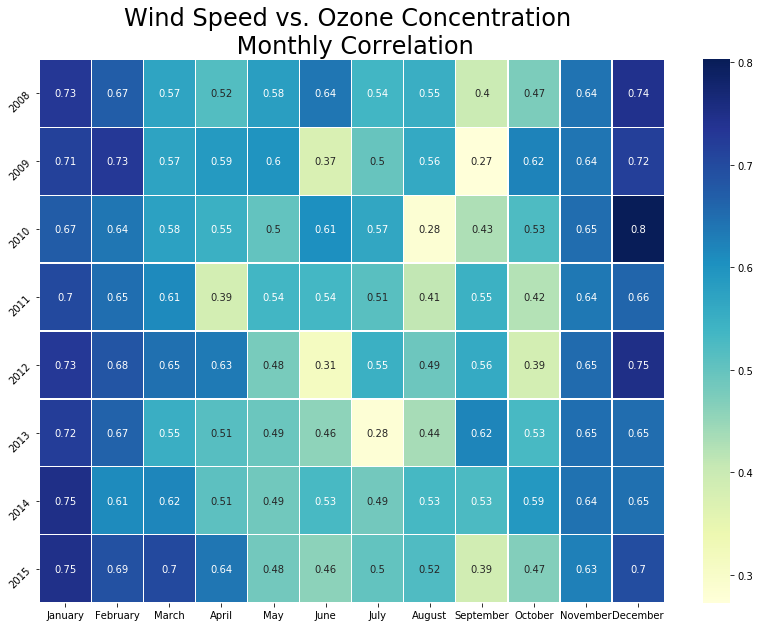

In [14]:
spd_corr = []    
for yr in years:
    spd_corr.append([])
    for mo in months:
        spd_corr[-1].append(df[(df.index.year == yr) & 
                                (df.index.month == mo)][['ozone_ppm','SPD']].corr().iloc[0,1])
spd_corr = np.array(spd_corr)
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(spd_corr, xticklabels = month_names, yticklabels = years, annot=True, linewidths=.2, cmap="YlGnBu")
plt.title("Wind Speed vs. Ozone Concentration \n Monthly Correlation", size=24)
plt.yticks(rotation=45)
plt.show()

**The wind speed had an overall correlation of 0.44 with ozone level, making it the second most correlated variable after temperature. This was a fascinating yet unexpected finding, exactly the type of discovery that is worthy of being further explored. The monthly breakdown of this data shows that wind speed correlates strongly with ozone levels in the winter months, but has a moderate association with ozone even in the summer months. Although ozone levels in the winter are too low to have a significant impact on human health, the strong association with wind speed is still an interesting and very persistent finding.**

In [15]:
temp_monthly = []
for mo in months:
        temp_monthly.append(df[(df.index.month == mo)][['ozone_ppm','TEMP']].corr().iloc[0,1])
temp_monthly = np.array(temp_monthly)

dewp_monthly = []
for mo in months:
        dewp_monthly.append(df[(df.index.month == mo)][['ozone_ppm','DEWP']].corr().iloc[0,1])
dewp_monthly = np.array(dewp_monthly)

spd_monthly = []
for mo in months:
        spd_monthly.append(df[(df.index.month == mo)][['ozone_ppm','SPD']].corr().iloc[0,1])
spd_monthly = np.array(spd_monthly)

In [16]:
monthly_corr = pd.DataFrame(data = {'Temperature correlation':temp_monthly, 'Dew point correlation':dewp_monthly, 
                                    'Wind speed correlation':spd_monthly}, index = month_names)

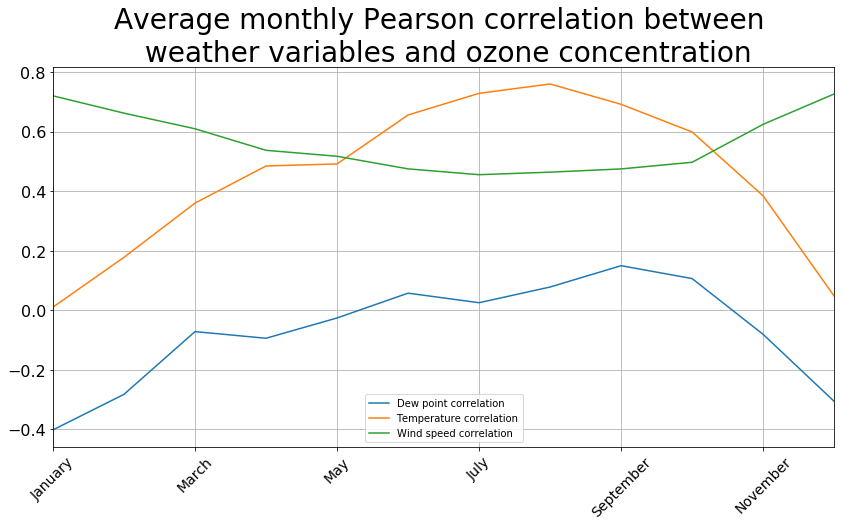

In [17]:
plt.rcParams['figure.figsize'] = [14, 7]
monthly_corr.plot()
plt.title("Average monthly Pearson correlation between \n weather variables and ozone concentration", size=28)
plt.xticks(rotation=45, size=14)
plt.yticks(size=16)
plt.grid()
plt.show()

**The monthly pearson correlations were plotted above for a direct comparison, and the seasonal differences can clearly be seen. Wind speed has the strongest relationship with ozone levels in the winter months, while temperature is the strongest predictor in the summer. **

In [18]:
vsb_monthly = []
for mo in months:
        vsb_monthly.append(df[(df.index.month == mo)][['ozone_ppm','VSB']].corr().iloc[0,1])
vsb_monthly = np.array(vsb_monthly)

stp_monthly = []
for mo in months:
        stp_monthly.append(df[(df.index.month == mo)][['ozone_ppm','STP']].corr().iloc[0,1])
stp_monthly = np.array(stp_monthly)

In [19]:
monthly_corr_all = monthly_corr

In [20]:
monthly_corr_all['Visibility correlation'] = vsb_monthly
monthly_corr_all['Air Pressure correlation'] = stp_monthly

In [21]:
monthly_corr_all.to_pickle('monthly_corr_all')